In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from cicTools import cic_stats
from scipy import spatial


In [29]:

r = .02 #radio de las esferas
lbox = 1 #largo del box
nran = 10000 #cantidad de esferas

#Armo las coordenadas random
seed = 1
np.random.seed(seed)
ranpos = np.random.rand(nran,3)
ran_tree = spatial.cKDTree(ranpos)

print('N_tot = ',nran)
print('Mean interparticle distance:',nran**(-1/3))
print('Wigner-Seitz radius:',(3/(4*np.pi*nran))**(1/3))
print('Testing radius:',r)


N_tot =  10000
Mean interparticle distance: 0.046415888336127795
Wigner-Seitz radius: 0.028794119114848617
Testing radius: 0.02


In [33]:

#Array de la cantidad de esferas
ns = np.geomspace(10,100000,20).astype(int)

#Inicializo variables
P0 = np.zeros(len(ns)) #Prob. de encontrar 0 gxs en este radio (VPF)
N_mean = np.zeros(len(ns)) #Num medio de gxs en esferas de radio r
xi_mean = np.zeros(len(ns)) #2pCF promediada en el volumen

#Quiero ver si las variables de arriba convergen a medida que aumento
#el num. de esferas:
for i,n in enumerate(ns):

    #Tiro centros y radios de esferas para analizar el box
    np.random.seed(seed+17*i) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    spheres = (lbox-2*r)*np.random.rand(n,3)+r #(b-a)*random + a; a=r, b=lbox-r

    #Inicializo variable para contar gxs en cada esfera de radio r
    ngal = np.zeros(n)
    for k in range(n):
        ngal[k] = len(ran_tree.query_ball_point(spheres[k],r)) 
        #Num de puntos en ran_tree que caen dentro de la esfera[k] de radio r
        
    P0[i] = len(np.where(ngal==0)[0])/n

    N_mean[i] = np.mean(ngal)

    xi_mean[i] = (np.mean((ngal-N_mean[i])**2)-N_mean[i])/N_mean[i]**2
    



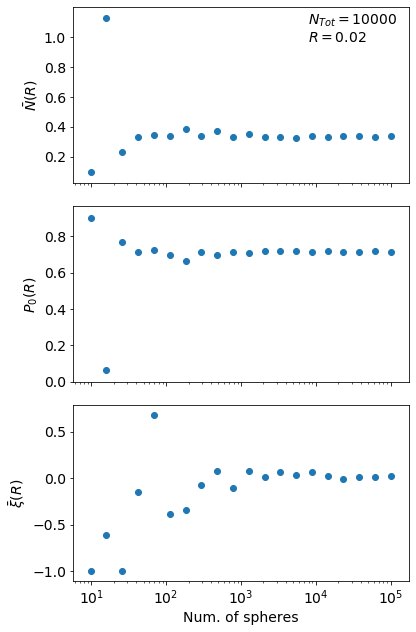

In [22]:
fig= plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.get_shared_x_axes().join(ax1, ax2, ax3)
plt.rcParams['font.size'] = 14

"""
Nmean
"""
ax1.scatter(ns,N_mean)

ax1.text(.7,.9,r'$N_{Tot}=$'+f'{nran}', transform=ax1.transAxes)
ax1.text(.7,.8,r'$R=$'+f'{r}', transform=ax1.transAxes)

ax1.set_ylabel(r'$\bar{N}(R)$')
ax1.set_xscale('log')

"""
P0
"""
ax2.scatter(ns,P0)

ax2.set_ylabel(r'$P_0(R)$')
ax2.set_xscale('log')

"""
Xi_mean
"""
ax3.scatter(ns,xi_mean)

ax3.set_xlabel('Num. of spheres')
ax3.set_ylabel(r'$\bar{\xi}(R)$')
ax3.set_xscale('log')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

plt.tight_layout()
plt.savefig('../plots/stability_randoms.png')
plt.show()
# %%


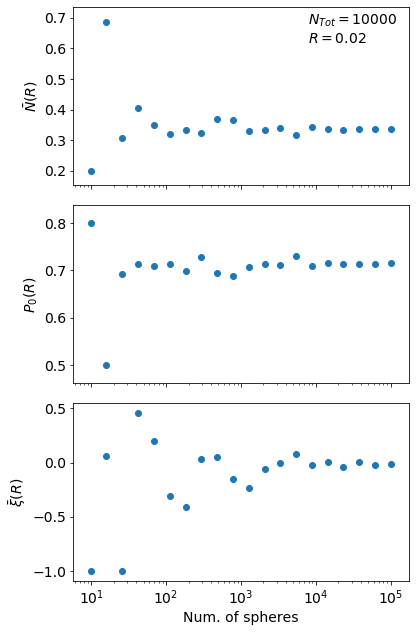

In [25]:
fig= plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.get_shared_x_axes().join(ax1, ax2, ax3)
plt.rcParams['font.size'] = 14

"""
Nmean
"""
ax1.scatter(ns,N_mean)

ax1.text(.7,.9,r'$N_{Tot}=$'+f'{nran}', transform=ax1.transAxes)
ax1.text(.7,.8,r'$R=$'+f'{r}', transform=ax1.transAxes)

ax1.set_ylabel(r'$\bar{N}(R)$')
ax1.set_xscale('log')

"""
P0
"""
ax2.scatter(ns,P0)

ax2.set_ylabel(r'$P_0(R)$')
ax2.set_xscale('log')

"""
Xi_mean
"""
ax3.scatter(ns,xi_mean)

ax3.set_xlabel('Num. of spheres')
ax3.set_ylabel(r'$\bar{\xi}(R)$')
ax3.set_xscale('log')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

plt.tight_layout()
plt.savefig('../plots/stability_randoms.png')
plt.show()
# %%


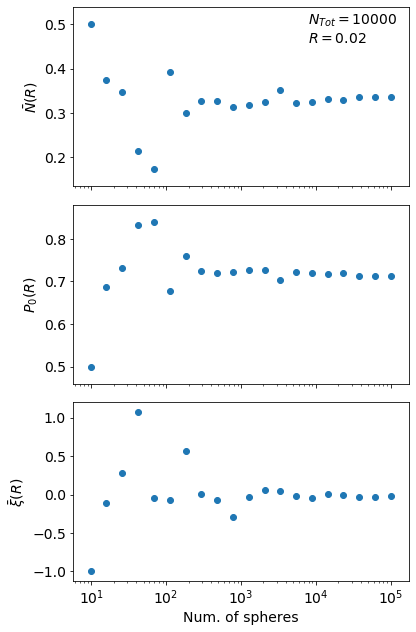

In [34]:
fig= plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.get_shared_x_axes().join(ax1, ax2, ax3)
plt.rcParams['font.size'] = 14

"""
Nmean
"""
ax1.scatter(ns,N_mean)

ax1.text(.7,.9,r'$N_{Tot}=$'+f'{nran}', transform=ax1.transAxes)
ax1.text(.7,.8,r'$R=$'+f'{r}', transform=ax1.transAxes)

ax1.set_ylabel(r'$\bar{N}(R)$')
ax1.set_xscale('log')

"""
P0
"""
ax2.scatter(ns,P0)

ax2.set_ylabel(r'$P_0(R)$')
ax2.set_xscale('log')

"""
Xi_mean
"""
ax3.scatter(ns,xi_mean)

ax3.set_xlabel('Num. of spheres')
ax3.set_ylabel(r'$\bar{\xi}(R)$')
ax3.set_xscale('log')

ax1.set_xticklabels([])
ax2.set_xticklabels([])

plt.tight_layout()
plt.savefig('../plots/stability_randoms.png')
plt.show()
# %%
